In [1]:
#Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

# 1. Principal Component Analysis
    a. Apply PCA on CC dataset.
    b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score
       has improved or not?
    c. Perform Scaling+PCA+K-Means and report performance.

In [2]:
#Loading the dataset

cc_dataset=pd.read_csv('CC GENERAL.csv')
cc_dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CC GENERAL.csv'

In [ ]:
#Applying the imputer to the dataset to fill the null values that will prevent the PCA

X = cc_dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [3]:
#a. Apply PCA on CC dataset

pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head()

NameError: name 'X' is not defined

In [4]:
#Performing the elbow method to find the best number of suitable clusters for the given data to implement k-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

NameError: name 'finaldf' is not defined

In [5]:
# Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

NameError: name 'finaldf' is not defined

In [6]:
y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for just PCA:',score)

NameError: name 'finaldf' is not defined

In [26]:
#Reload the dataset again
X = cc_dataset.iloc[:,1:]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)

X = imputer.transform(X)

print(X)
X=pd.DataFrame(X)

[[4.09007490e+01 8.18182000e-01 9.54000000e+01 ... 1.39509787e+02
  0.00000000e+00 1.20000000e+01]
 [3.20246742e+03 9.09091000e-01 0.00000000e+00 ... 1.07234022e+03
  2.22222000e-01 1.20000000e+01]
 [2.49514886e+03 1.00000000e+00 7.73170000e+02 ... 6.27284787e+02
  0.00000000e+00 1.20000000e+01]
 ...
 [2.33986730e+01 8.33333000e-01 1.44400000e+02 ... 8.24183690e+01
  2.50000000e-01 6.00000000e+00]
 [1.34575640e+01 8.33333000e-01 0.00000000e+00 ... 5.57556280e+01
  2.50000000e-01 6.00000000e+00]
 [3.72708075e+02 6.66667000e-01 1.09325000e+03 ... 8.82889560e+01
  0.00000000e+00 6.00000000e+00]]


In [33]:
#Apply scaling on the dataset

scaler = StandardScaler()
scaler.fit(X)
x_scaler = scaler.transform(X)

#Apply PCA with k value as 3 again

pca = PCA(3)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_dataset[['TENURE']]],axis=1)
finaldf.columns = finaldf.columns.astype(str)
print(finaldf)

             0         1         2  TENURE
0    -1.682220 -1.076451  0.488510      12
1    -1.138298  2.506476  0.601185      12
2     0.969676 -0.383529  0.102381      12
3    -0.873628  0.043166  1.460160      12
4    -1.599433 -0.688581  0.365103      12
...        ...       ...       ...     ...
8945 -0.359627 -2.016145 -0.995337       6
8946 -0.564365 -1.639121 -1.290221       6
8947 -0.926201 -1.810785 -0.474705       6
8948 -2.336546 -0.657962  0.974736       6
8949 -0.556422 -0.400466  1.015184       6

[8950 rows x 4 columns]


In [34]:
#Apply k-means on the scaled PCA output

nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [35]:
y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for scaled=pca=keans:',score)

Silhoutte score for scaled=pca=keans: 0.37589362712467117


#Observation:
    
 The score is reduced after performing the PCa, so this data need not to be undergone with PCA.

# 2. Use pd_speech_features.csv
    a. Perform Scaling
    b. Apply PCA (k=3)
    c. Use SVM to report performance

In [36]:
#Load the dataset

speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [37]:
#Apply scaling on the dataset

x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

#Apply PCA with value 3

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052429  1.476820  -6.828352      1
1   -10.641066  1.590407  -6.811679      1
2   -13.520081 -1.243922  -6.794530      1
3    -9.142524  8.848872  15.300293      1
4    -6.758089  4.624223  15.645680      1
..         ...       ...        ...    ...
751  22.377450  6.470192   1.439474      0
752  13.503270  1.450493   9.344886      0
753   8.328507  2.392513  -0.911242      0
754   4.074595  5.417627  -0.847067      0
755   4.052810  6.076465  -2.022283      0

[756 rows x 4 columns]


In [38]:
#Apply SVM classifier

clf = SVC(kernel='linear')
x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

SVM accuracy = 0.768


In [46]:
#Classification report for the above classifier

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



# 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2

In [45]:
#Load the IRIS dataset

iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
#apply the standard scaling

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(iris_df.iloc[:,:-1].values)

#Label encoding the species column
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

#Applying LDA on the Datset

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


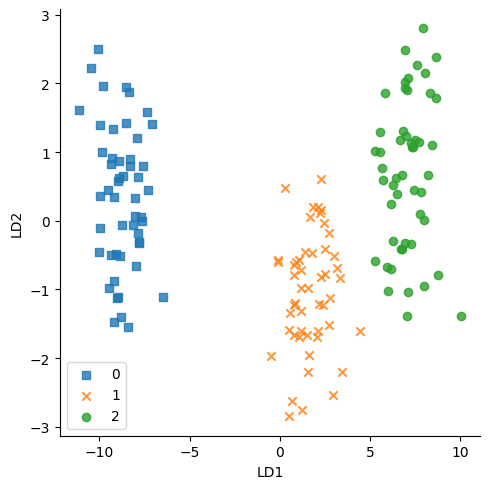

In [43]:
markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()

# 4. Briefly identify the difference between PCA and LDA

Answer: Dimensionality reduction in machine learning involves selecting a subset of significant variables to decrease the number of random variables considered. Two primary algorithms for this purpose are Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

PCA is an unsupervised technique that derives results without relying on output labels. It transforms the dataset to emphasize maximum variance between features, effectively ignoring redundant features. Since the variance among features is not influenced by the outcome, PCA disregards output labels.

In contrast, LDA is a supervised technique that relies on output labels. Using this label information, LDA reduces the feature dimensions and identifies a decision boundary. It then projects data points onto new dimensions to ensure that clusters are as distinct as possible, with individual components within a cluster being as close to the cluster centroid as possible.